In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import sys
import os
from pathlib import Path


In [5]:
df = pd.read_csv('P:/Cloud_counselage/DS_DATESET.csv')
df = df.drop(['Certifications/Achievement/ Research papers','Link to updated Resume (Google/ One Drive link preferred)','link to Linkedin profile'], axis = 1)



In [6]:
df.columns

Index(['First Name', 'Last Name', 'City', 'State', 'Zip Code',
       'DOB [DD/MM/YYYY]', 'Age', 'Gender', 'Email Address', 'Contact Number',
       'Emergency Contact Number', 'College name', 'University Name', 'Degree',
       'Major/Area of Study', 'Course Type', 'Which-year are you studying in?',
       'CGPA/ percentage', 'Expected Graduation-year', 'Areas of interest',
       'Current Employment Status', 'Have you worked core Java',
       'Programming Language Known other than Java (one major)',
       'Have you worked on MySQL or Oracle database',
       'Have you studied OOP Concepts',
       'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]',
       'How Did You Hear About This Internship?', 'Label'],
      dtype='object')

In [7]:
df.isnull().sum().head()
df.dropna()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24/09/2000,19,Male,bharnes0@harvard.edu,6345186600,...,Artificial Intelligence,Student,Yes,HTML/CSS,Yes,No,6,10,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,...,Cloud Computing,Student,Yes,PHP,No,Yes,10,7,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,...,IoT,Student,Yes,C,No,No,8,6,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26/12/1999,20,Female,rproud3@flavors.me,7507196200,...,Digital Marketing,Student,No,PHP,No,Yes,9,6,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21/09/1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Cloud Computing,Student,No,Python,No,Yes,8,6,Facebook,ineligible
5,Farlay,Anstis,Sangli,Maharashtra,416415,12/2/2000,20,Male,fanstis5@zdnet.com,8429984749,...,Python,Student,Yes,PHP,Yes,No,6,7,Twitter,ineligible
6,Vanna,Keighley,Solapur,Maharashtra,413224,18/03/2000,20,Female,vkeighley6@un.org,3929498765,...,QMS/Testing,Student,Yes,PHP,Yes,No,10,7,Facebook,eligible
7,Vikki,Ottawell,Kolhapur,Maharashtra,416004,21/07/1998,21,Female,vottawell7@4shared.com,4906898554,...,Data Science,Student,No,C++,No,Yes,9,9,Newspaper,eligible
8,Stanwood,Ferron,Mumbai,Maharashtra,400055,9/12/1999,20,Male,sferron8@vkontakte.ru,8739225175,...,QMS/Testing,Student,No,C++,Yes,Yes,9,10,Other,eligible
9,Tommie,Rastall,Kolhapur,Maharashtra,416119,28/10/1997,22,Male,trastall9@canalblog.com,3634744513,...,IoT,Student,Yes,.Net,No,Yes,10,10,Blog post,ineligible


# STATEMENT a 

The number of students applied to different technologies.

In [8]:
areas = np.array(['Artificial Intelligence','Big Data','Cloud Computing ','IoT ','Digital Marketing ','Python ','QMS/Testing ','Data Science ','Machine Learning','Blockchain ','RPA','DevOps ','Web Development ','Cyber Security ', 'Mobility','Information Security'])
areas.sort()
areas
i = df.groupby('Areas of interest')['First Name'].count()
i

Areas of interest
Artificial Intelligence     627
Big Data                    612
Blockchain                  623
Cloud Computing             560
Cyber Security              638
Data Science                601
DevOps                      674
Digital Marketing           624
Information Security        598
IoT                         630
Machine Learning            671
Mobility                    631
Python                      652
QMS/Testing                 633
RPA                         589
Web Development             637
Name: First Name, dtype: int64

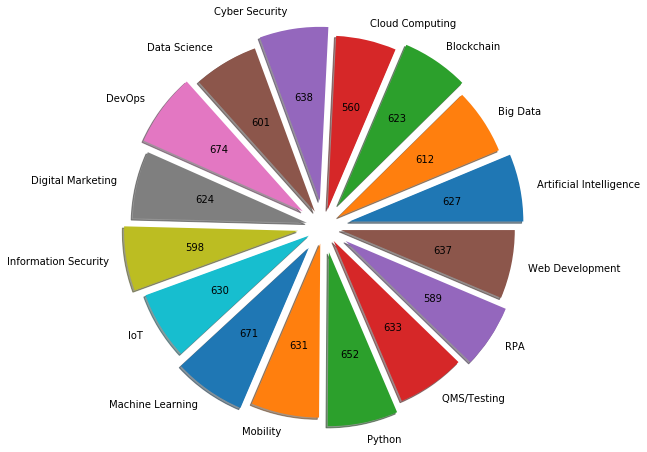

In [9]:
plt.figure()
explode = (0.3,0.2,0.3,0.2,0.3,0.2,0.3,0.2,0.3,0.2,0.3,0.2,0.3,0.2,0.3,0.2)
def make_autopct(i):
    def my_autopct(pct):
        total = sum(i)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct
    
        
    
plt.pie(i,labels = areas,explode = explode,shadow = True,radius = 2,autopct = make_autopct(i))
plt.show()


# STATEMENT b

The number of students applied for Data Science who knew ‘’Python” and who didn’t.

In [10]:
ds = df[df['Areas of interest']=='Data Science ']
ds_py = ds[ds['Programming Language Known other than Java (one major)']=='Python']['Email Address'].count()
total_ds = 601
ds_python = 66
ds_without_python = 535

In [11]:
x = ['Total_DS','DS_Python','DS_without_Python']
y = [601,66,535]

<BarContainer object of 3 artists>

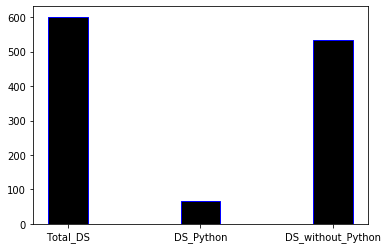

In [12]:
plt.bar(x,y,width = 0.3,color='black',edgecolor = 'b')

# Statement c

The different ways students learned about this program.

In [13]:
dw = df['How Did You Hear About This Internship?'].unique()
modes = ['Blog post','Ex/Current Employee','Facebook','Friend','Intern','LinkedIn','Newspaper','Other','Twitter']
dw_count = df.groupby('How Did You Hear About This Internship?')['First Name'].count()
dw_count

How Did You Hear About This Internship?
Blog post              1116
Ex/Current Employee    1007
Facebook               1084
Friend                 1109
Intern                 1173
LinkedIn               1112
Newspaper              1162
Other                  1077
Twitter                1160
Name: First Name, dtype: int64

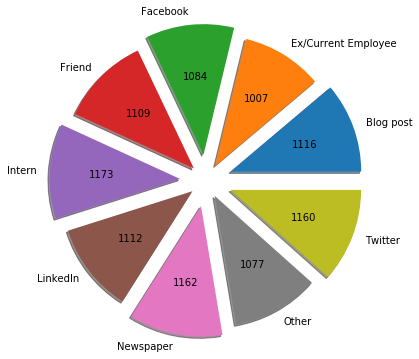

In [14]:
plt.figure()
explode = (0.3,0.2,0.3,0.2,0.3,0.2,0.3,0.2,0.3)
def make_autopct(dw_count):
    def my_autopct(pct):
        total = sum(i)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct
    
        
    
plt.pie(dw_count,labels = modes,explode = explode,shadow = True,radius = 1.5,autopct = make_autopct(i))
plt.show()


# Statement d

 Students who are in the fourth year and have a CGPA greater than 8.0. 

In [15]:
sf = df[df['Which-year are you studying in?']=='Fourth-year']

In [16]:
sf = sf[sf['CGPA/ percentage']>8.0]
col = ['First Name','Last Name']
sf['Final List'] = sf['First Name']+" " + sf['Last Name']


In [17]:
print("The Total number of Students with CGPA greater than 8.0 are ")
sf['Final List'].count()

The Total number of Students with CGPA greater than 8.0 are 


1697

In [18]:
print("The students are")
sf['Final List'].head()

The students are


1            Velma Allone
2        Thibaut Scotland
5           Farlay Anstis
8         Stanwood Ferron
12    Adelaide Trebilcock
Name: Final List, dtype: object

# Statement e

Students who applied for Digital Marketing with verbal and written communication score greater than 8. 

In [19]:
digmar = df[df['Areas of interest']=="Digital Marketing "]
digmar = digmar[digmar['Rate your written communication skills [1-10]']>8.0 ]
digmar = digmar[digmar['Rate your verbal communication skills [1-10]']>8.0 ]
digmar.head()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],How Did You Hear About This Internship?,Label
294,Hazlett,Orpen,Pune,Maharashtra,411011,21/11/1996,23,Male,horpen86@csmonitor.com,4522097136,...,Digital Marketing,Student,No,C#,Yes,Yes,9,10,Intern,eligible
420,Dolorita,Leglise,Kolhapur,Maharashtra,416234,8/6/1996,23,Female,dleglisebo@github.io,8504679907,...,Digital Marketing,Student,Yes,PHP,No,Yes,9,10,Blog post,eligible
424,Jessa,Lightoller,NaviMumbai,Maharashtra,400701,21/12/1997,22,Female,jlightollerbs@hibu.com,8671906564,...,Digital Marketing,Student,Yes,HTML/CSS,No,Yes,9,10,Ex/Current Employee,ineligible
500,Linet,McGuiness,Kolhapur,Maharashtra,416119,15/06/2000,19,Female,lmcguinessdw@rakuten.co.jp,7118250315,...,Digital Marketing,Student,Yes,.Net,Yes,Yes,9,10,Newspaper,eligible
588,Elsinore,Adshed,NaviMumbai,Maharashtra,400701,23/10/1997,22,Female,eadshedgc@digg.com,6446069414,...,Digital Marketing,Student,Yes,HTML/CSS,No,No,10,10,Newspaper,eligible


# Statement f

Year-wise and area of study wise classification of students

In [20]:
first_year = df[df['Which-year are you studying in?']=="First-year"]
second_year = df[df['Which-year are you studying in?']=="Second-year"]
third_year = df[df['Which-year are you studying in?']=="Third-year"]
fourth_year = df[df['Which-year are you studying in?']=="Fourth-year"]

year = ['First Year','Fourth Year','Second Year','Third Year']
j = df.groupby('Which-year are you studying in?')['First Name'].count()
j

Which-year are you studying in?
First-year     2510
Fourth-year    2477
Second-year    2550
Third-year     2463
Name: First Name, dtype: int64

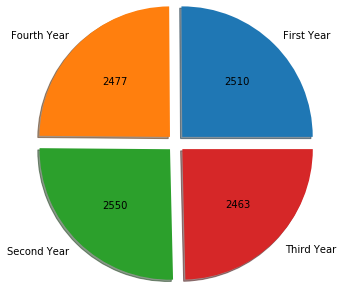

In [21]:
plt.figure()
explode = (0.1,0.1,0.1,0.1)
def make_autopct(j):
    def my_autopct(pct):
        total = sum(i)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct
    
        
    
plt.pie(j,labels = year,explode = explode,shadow = True,radius = 1.5,autopct = make_autopct(i))
plt.show()


In [22]:
df['Major/Area of Study'].unique()

array(['Electrical Engineering', 'Electronics and Telecommunication',
       'Computer Engineering'], dtype=object)

In [23]:
streams = ['Computer Engneering','Electrical Engineering','Electronics and Telecommunication']
k = df.groupby('Major/Area of Study')['First Name'].count()
k

Major/Area of Study
Computer Engineering                 5971
Electrical Engineering               2033
Electronics and Telecommunication    1996
Name: First Name, dtype: int64

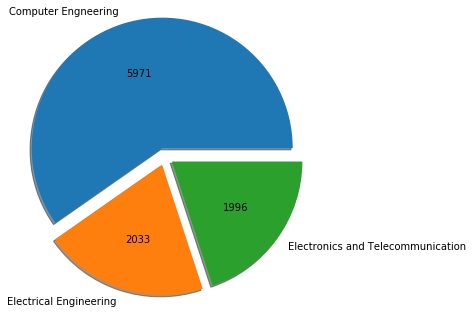

In [24]:
plt.figure()
explode = (0.1,0.1,0.1)
def make_autopct(k):
    def my_autopct(pct):
        total = sum(i)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct
    
        
    
plt.pie(k,labels = streams,explode = explode,shadow = True,radius = 1.5,autopct = make_autopct(i))
plt.show()


# Statement g

 City and college wise classification of students

In [25]:
ct = df.groupby('City')['First Name'].count()
city = ['Kolhapur','Mumbai','NaviMumbai','Pune','Sangli','Solapur']

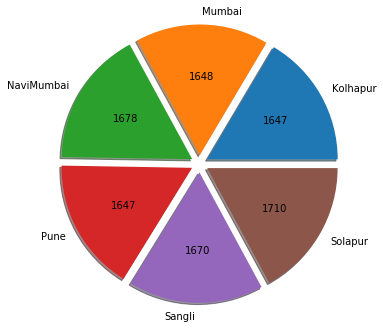

In [26]:
plt.figure()
explode = (0.1,0.1,0.1,0.1,0.1,0.1)
def make_autopct(ct):
    def my_autopct(pct):
        total = sum(i)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct
    
        
    
plt.pie(ct,labels = city,explode = explode,shadow = True,radius = 1.5,autopct = make_autopct(i))
plt.show()


College Wise


In [27]:
df6 = df.filter(['City','College name'])

Text(0.5, 1.0, 'Classification on basis of college')

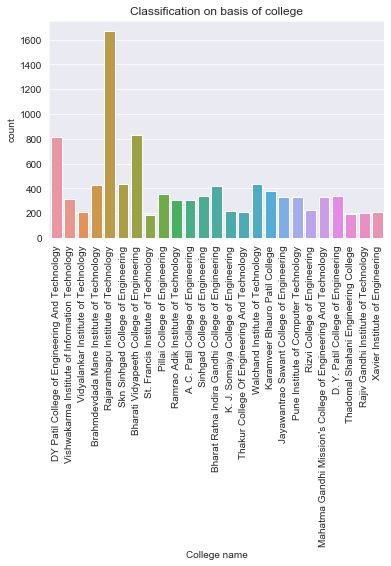

In [28]:
sns.set_style('darkgrid')
sns.countplot(x='College name',data = df6)
plt.xticks(rotation=90)
plt.title(label='Classification on basis of college')



In [29]:
data1 = df['CGPA/ percentage']
data2 = df['Label']
data3 = df.filter(['CGPA/ percentage','Label'])

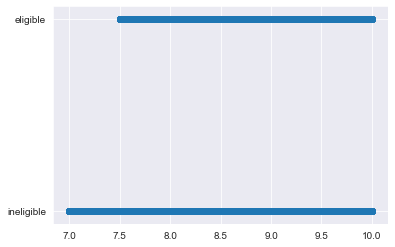

In [30]:
plt.scatter(data1, data2)
plt.show()

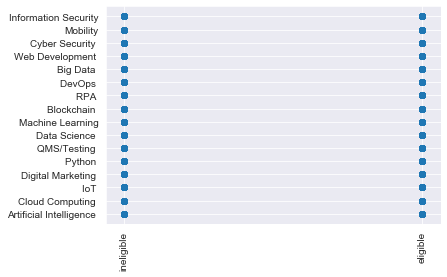

In [31]:
data3 = df['Areas of interest']
plt.scatter(data2,data3)
plt.xticks(rotation=90)
plt.show()



In [32]:
data1 = df.filter(['Which-year are you studying in?','Major/Area of Study','Label'])
data1.shape

(10000, 3)

C:\Users\prath\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


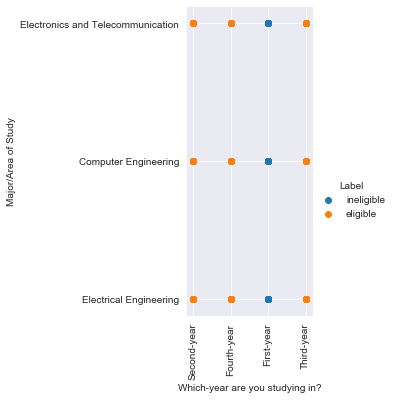

In [33]:


sns.FacetGrid(data1,hue="Label",size=5).map(plt.scatter,"Which-year are you studying in?","Major/Area of Study").add_legend();
plt.xticks(rotation=90)
plt.show()

